Net IDs: hak68, ota3, gnp24

# Cost of Diabetes Care in the USA

## Introduction

Diabetes is a chronic disease that affects millions of people in the United States. Currently, there is no cure for diabetes but rather patients manage their symptoms with medications to lower blood glucose levels, medical devices to monitor their glucose levels, and by maintaining a healthy diet and lifestyle. Also, there are many other health problems that could arise in those with diabetes such as high blood pressure, high cholestral, kidney disease, vision problems, and an increased risk for infections. Recognizing that the life-long management of diabetes and its many complications could result in high costs for many with the disease, we sought to analyze which parts of diabetes managment actually produce the highest cost for patients and to use this to predict which types of patients will be high cost diabetes patients and why. Cost, unfortumately, becomes a point of stress and contention between people and hospitals/insurance companies especially in those with chronic illnesses. There are many beneifts to knowing what makes diabetes expensive such as: hospitals could use this knowledge to create more efficient diabetes managent programs (ones with reduced cost yet effective results) and more trasnpearency between patients and the cost of their treatments could decrease the frequency of medical debt in the United States.


**Data sources**

We analyzed a data set of about 20,000 diabetes patients with information about their diabetes treatment such as medication type usage, number of hospital visits, number of labs, length of stay, patient demographic information, and average cost for the patient that year.

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn import preprocessing
from scipy import stats

import statsmodels.api as sm

import duckdb
import warnings 
warnings.filterwarnings('ignore')

import plotly.express as px

Original Dataframes

In [160]:
medication_df = pd.read_csv("Medication_Data_Kaggle_V1.csv")
socio_eco_df = pd.read_csv("Socio_Economics_Data_Kaggle_V1.csv")
patient_data_training_df = pd.read_csv("Patient_Data_Training_Kaggle_V1.csv")
patient_data_testing_df = pd.read_csv("Patient_Data_Testing_Features.csv")

Analysis-ready Dataframe

In [161]:
diabetes_df = pd.read_csv("diabetes_1.csv")
diabetes_df.head(3)

,ID,Year,Age,Race,Sex,State,Zip_Code,MSA,Enrollment_Type_Categorized,Enrollment_Months,...,sitagliptin_and_metformin_hydrochloride,Avg_ADI,Max_ADI,Min_ADI,SVI1,SVI3,SVI4,SVI,MDI,Region
0,68802021,2021,68,White,Male,Michigan,48176,11460,10,12.0,...,0,30.157895,67.0,8.0,-27.707059,-18.227551,-27.590337,-27.727856,14.16,NaN
1,3422021,2021,60,Black,Male,Michigan,49224,12980,20,12.0,...,0,80.200000,100.0,52.0,-21.266317,0.272289,-21.271530,-21.282509,15.39,NaN
2,7892020,2020,46,White,Male,Michigan,49016,12980,20,12.0,...,0,82.545455,97.0,63.0,0.529493,0.376685,0.616187,0.555240,15.39,NaN


**Research Question**

Can we predict how much a patient pays for diabetes management considering the patient demographics and types of treatments recieved?

**Summary of Findings**

CANGE THIS!!!

Yes we are able to predict cost based on demographics and certain factors in care because we were able to create a multivariate least squares regression model with random residuals. However, we found that some variates were more significant than others including region and race. 

## Data description

**What are the observations (rows) and the attributes (columns)?**

The dataframe, diabetes_df, which is our analysis ready data, observes certain attributes for each diabetes patient, recognized by their unique patient id (each row is data for one patient). 

diabetes_df is a combination of three dataframes each with a different theme of atributes:

attributes about general demographics of the patient, the many factors that might have went into a patient's diabetes care, and the cost of care for each patient:

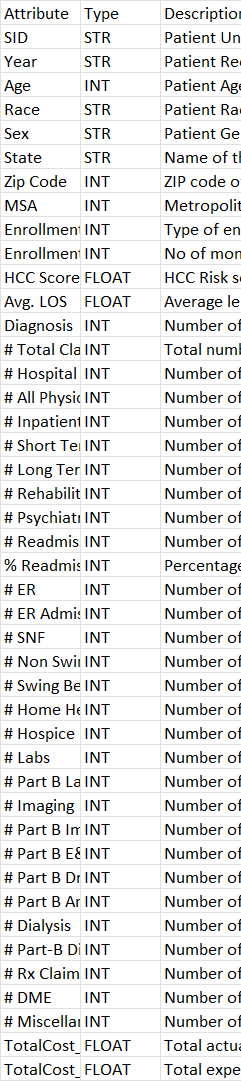

types of medication taken by the patient. The values in each row are binary, either a 0 or 1 indicating that, no, the patient did not take this medication, or yes, they did:

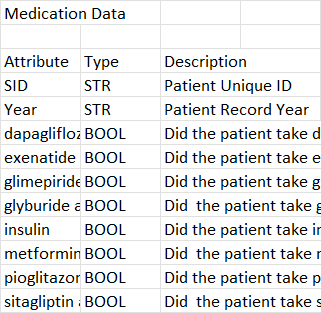

attributes concerning a patient's socio-economic background: 

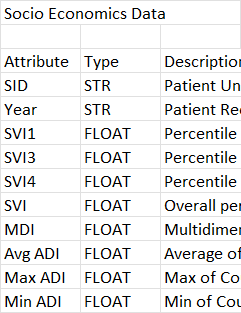  



**Why was this dataset created?**

This data set was created to analyze the factors that go into diabetes care, the demographics of diabetes patients, and how much it cost these patients to get care. This data could be useful for hospitals to help them improve their healthcare management or chronic disease management programs. 

**Who funded the creation of the dataset?**

We do not know who funded the creation of this dataset, but we know that it was provided by Softec, an AI company as part of a data science competition. 

**What processes might have influenced what data was observed and recorded and what was not?**

Patient consent & participation might have influenced or affected how much specifc data was collected. Certain patients might not want to disclose certain information. Also, the data was collected from adults only, most of them being elderly, so it is likely that sources for children were not available. The year that the patient information was recorded on the dataset goes as far back as 2017 which may or may not be enough time to make predictions about the rise and fall of diabetes healthcare so the observation of long-term trends are affected. Also, we do not know the extent of the resources that the data collectors had. It could be that they paid certain hospitals for data; in that case the prices of datasets they were willing to pay for, affects what is recorded. The data collectors could have also targeted certain areas or demographics to get data from which also affects what is observed and what is not.


**What preprocessing was done, and how did the data come to be in the form that you are using?**

The data we are using to build our visualizations is the result of combining four seperate, but connected, datasets into a larger one called diabetes_df. These four dataframes were connected by their ID column. So in creating this dataframe, we made sure that the uniquenss of patient ID's and the amount of them, were preserved. Also, we wanted to make the columns of the dataframe easier to query, and not have to repeat the same querying syntax for special column names, so we replaced all spaces with _. 

**If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**

We do not know how aware these patients were at the collection of the data. The attributes of the dataframe do not seem like data that could be collected with surveys or interviews, but rather data that has to be from some type of mass medical record. Patients are not often aware of what hospitals do with their data so it is a real possibility that the people who the dataset is based on, have no idea that they are the subject.

**Where can your raw source data be found, if applicable?**

This question is not applicable to us, as we do not know where Softec got the dataset from. 

# Data limitations

One limitation of our data is that there is a total cost of patient care for that year, but the indivudal factors that went into the care are not priced. So we do not explicity know which factors such as medication taken, length of stay, treatments given etc. affected the total price the most. We will have to find out these prices through predictions from our model intead of observed occurences in real life. When trying to predict these prices, our model might have oddities or outliers that might make it difficult for us to confidently make predictions for these values.

Another limitation of our data is regarding the lack of information we have about what some of the columns are trying to portray. For example, there are columns SVI1, SVI3, SVI4, and SVI that measure percentile rankings for various socioeconomic and ethnic status. However, some of these values are negative numbers that also have absolute value greater than 1 and all of the positive numbers are less than 1. So, do negative percentiles have any significance? Are the percentile values out of 1 or out of 100? Or is the data in these columns simply meaningless? These are the questions we have to consider in our analysis and if we decide to not use those columns at all, then we lose information about a patient's socioeconomic status when creating our predictive model.

# Preregistration statements

Accross states in the USA, there are differences in regions with some being more or less expensive than others and different regions having different ways of life. We wanted to see how this extends to the cost of diabetes so our first preregistered hypothesis concerns the variation in cost of diabetes based on region and a further analysis to determine the significance of our results.

**Null Hypothesis 1:** There is no significant difference in total cost of treatment for patients in the South and other regions.

**Alternative Hypothesis 1:** Patients who live in the South spend more money on the total cost of treatment.

**Analysis:** We will create a new column indicating which region a patient lives in. Then, we will run an Ordinary Least Squares regression where we input regions as a dummy variables and output cost of treatment. The Northeast region dummy variable will be our reference variable so that we can test that the coefficient for the South region is greater. 

The Area Deprivation Index (ADI) allows for a ranking of neighborhoods by socioeconomic statuses and advantages. A high ADI indicates high area deprivation. We wanted to explore the effect of ADI on how much a patient pays for diabetes care and do further analysis to determine the significance of our results.

**Null Hypothesis 2:** The ADI of a patient has no signficant effect on how much they will spend on diabetes care.

**Alternative Hypothesis 2:** Patients with a high ADI index will spend less on diabetes care.

**Analysis:** Run a multivariable regression, with all else variables equal, and see the effect of area deprivation index on total cost of care for patient. Also do an OLS regression.

## Data Analysis and Intepretation

### Interesting Data Visualizations

**States by Average Cost of Diabetes**

The 'States by Average Cost of Diabetes' map below uses the 'State' and 'TotalCost_Y_Actual' columns from diabetes_df to provide a color mapping of states and the average amount patients who live there pay for diabetes. The average cost ranges from about 1000 to 52,000 dollars($). The map shows that Mississippi, New York, and Nevada have higher cost of diabetes care but there are states near them such as Louisiana, Pennsylvania, and California, respectively, which have much lower cost of diabetes from this dataset. So these large differences in cost for states within the same region might affect the results of our analysis of region and cost later on.

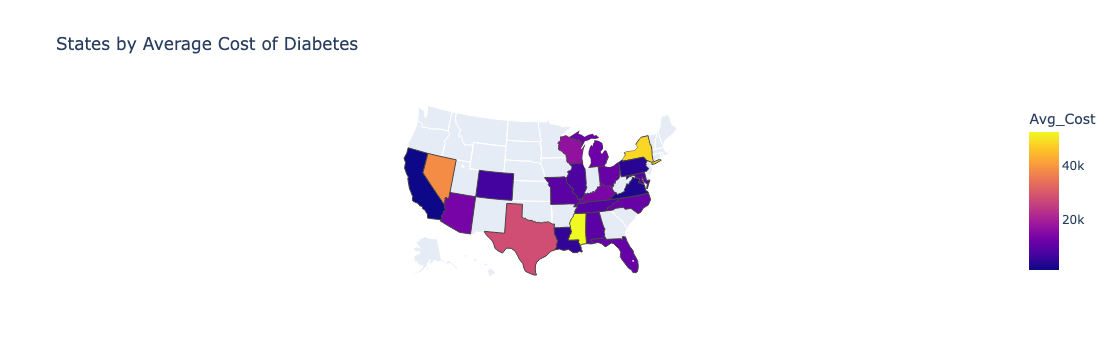

In [162]:
state_abbreviations = {'Michigan': 'MI','New York': 'NY','Florida': 'FL','Illinois': 'IL',
                       'Ohio': 'OH','Texas': 'TX','Colorado': 'CO','North Carolina': 'NC',
                       'California': 'CA','Missouri': 'MO','Nevada': 'NV','Wisconsin': 'WI',
                       'Pennsylvania': 'PA','Arizona': 'AZ','Virginia': 'VA','Maryland': 'MD',
                       'Alabama': 'AL','Mississippi': 'MS','Tennessee': 'TN','Kentucky': 'KY',
                       'Louisiana': 'LA','Washington': 'WA','Georgia': 'GA','Massachusetts': 'MA'}

state_and_cost = duckdb.sql("SELECT State, AVG(TotalCost_Y_Actual) AS Avg_Cost \
FROM (SELECT * FROM diabetes_df WHERE TotalCost_Y_Actual != 'NaN') b \
WHERE State != 'Unknown' GROUP BY State").df()
state_and_cost['State_Abbreviation'] = state_and_cost['State'].map(state_abbreviations)

fig = px.choropleth(state_and_cost, locations = 'State_Abbreviation', \
                    locationmode = 'USA-states', color = 'Avg_Cost', \
                    scope = 'usa', title = 'States by Average Cost of Diabetes')
fig.show()

**Total Cost vs Race**

The 'Total Cost vs Race' bar plot below shows the range of cost depending on a patient's race/ethnicity. It shows that patients who North American Natives spend much more on diabetes care compared to other ethcities and also have a wider range of outliers. A regression model will tell us exactly how much impact being a North American Native has on cost and if this is indeed a significant amount.

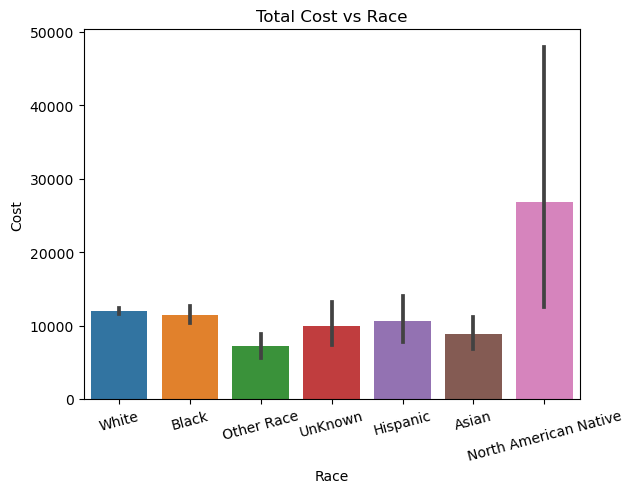

In [163]:
sns.barplot(x='Race', y='TotalCost_Y_Actual', data=diabetes_df,)
plt.xlabel('Race')
plt.ylabel('Cost')
plt.title('Total Cost vs Race')
plt.xticks(rotation = 15)
plt.show()

**Total Cost vs Average ADI**

The 'Total Cost vs Average ADI' scatterplot below shows the distribution of diabetes cost based on ADI. The distribution looks almost normal in that extremely low and high ADI's are associated with a lower cost and ADI's that are in the middle region have a slightly higher total cost along with outliers. To test our hypothesis that patients with lower ADI's pay less for diabetes cost, we will have to do further analysis that gives us the significance of the ADI and we canot determine that from this plot alone.


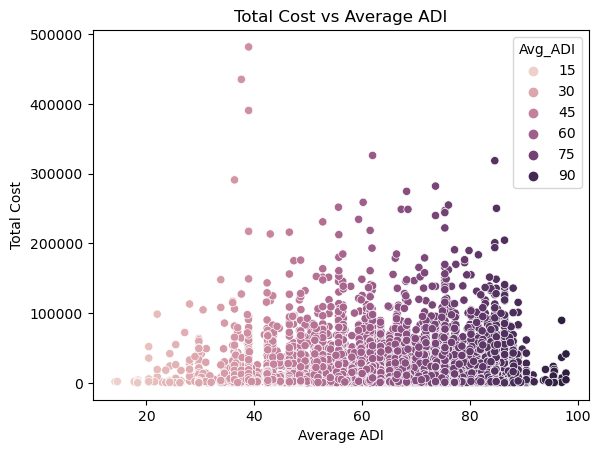

In [164]:
sns.scatterplot(data = diabetes_df, x = 'Avg_ADI', y = 'TotalCost_Y_Actual', hue = 'Avg_ADI')
plt.xlabel('Average ADI')
plt.ylabel('Total Cost')
plt.title('Total Cost vs Average ADI')
plt.show()

**Medication Usage by Race**

The 'Medication Usage by Race' bar graph below shows how many people use each type of diabetes medication in diabetes_df. Then for each medication, it shows the number of people from each race who use it. We see that dapagliflozin is the most used diabetes medication from our database and people whose race are White use it more followed by people whose race are Black. The race distribution of the bar graphs are mainly due to the number of datapoints we have for each race. We have more patients who are White than who are other races. We did this graph to see if there is a relationship between medicine usage and race that is worth exploring in our later analysis.

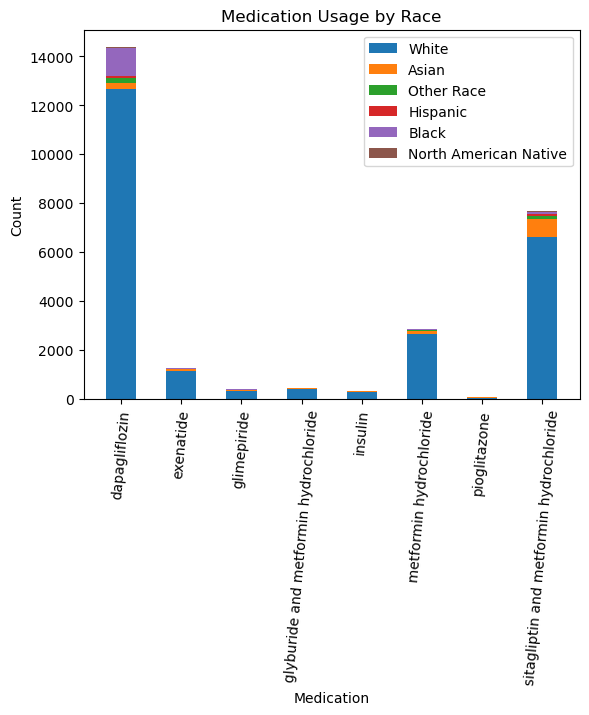

In [165]:
melted_meds = pd.melt(diabetes_df, id_vars = ['ID', 'Age', 'Sex', 'Race','Region', 'TotalCost_Y_Actual'] , value_vars = diabetes_df.iloc[:, 44:52], var_name = 'medicine', value_name = 'uses_or_not')

med_by_race = duckdb.sql("SELECT Race, medicine, SUM(uses_or_not) as med_count FROM melted_meds WHERE Race != 'UnKnown' GROUP BY Race, medicine").df()


race_count = {}
for i in range(0, 6):
    race_count[med_by_race['Race'][i]] = [med_by_race['med_count'][i], med_by_race['med_count'][i + 6], med_by_race['med_count'][i + 12], med_by_race['med_count'][i +18], med_by_race['med_count'][i + 24], med_by_race['med_count'][i + 30], med_by_race['med_count'][i + 36], med_by_race['med_count'][i + 42] ]


bottom = np.zeros(8)
width = 0.5
for boolean, count in race_count.items():
    p = plt.bar(medication_df.columns[2:], count, width, label=boolean, bottom=bottom)
    bottom += count
plt.title("Medication Usage by Race")
plt.legend(loc="upper right")
plt.xlabel("Medication")
plt.ylabel("Count")
plt.xticks(rotation = 85)
plt.show()

**Medication Usage by Patient Expenditure**

The 'Medication Usage by Patient Expenditure' bar graph below shows the amount of people in the diabetes_df dataframe who use each type of medicine and for each medicine, the amount of people who pay within a certain cost range for their total diabetes treatments.

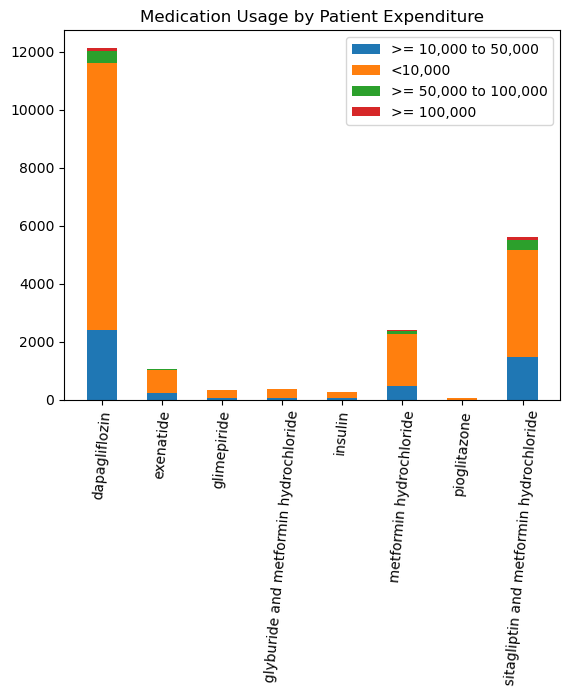

In [166]:
cost = diabetes_df['TotalCost_Y_Actual']
very_high = cost[cost >= 100000] #205
high = cost[(cost >= 50000 ) & (cost < 100000)] #679
med = cost[(cost >= 10000 ) & (cost < 50000)] #3493
low = cost[cost < 10000] #11951

med_by_cost = duckdb.sql("SELECT medicine, (CASE WHEN TotalCost_Y_Actual >= 100000 THEN '>= 100,000' \
WHEN TotalCost_Y_Actual >= 50000 AND TotalCost_Y_Actual < 100000 THEN '>= 50,000 to 100,000' \
WHEN TotalCost_Y_Actual >= 10000 AND TotalCost_Y_Actual < 50000 THEN '>= 10,000 to 50,000' \
WHEN TotalCost_Y_Actual < 10000 THEN '<10,000' ELSE 'NA' END ) AS cost_range, SUM(uses_or_not) as med_count FROM melted_meds WHERE cost_range != 'NA' GROUP BY cost_range, medicine").df()

cost_range_count = {}
for i in range(0, 4):
    cost_range_count[med_by_cost['cost_range'][i]] = [med_by_cost['med_count'][i], med_by_cost['med_count'][i + 4], med_by_cost['med_count'][i + 8], med_by_cost['med_count'][i +12], med_by_cost['med_count'][i + 16], med_by_cost['med_count'][i + 20], med_by_cost['med_count'][i + 24], med_by_cost['med_count'][i + 28] ]
# print(cost_range_count)

bottom = np.zeros(8)
width = 0.5
for boolean, count in cost_range_count.items():
    p = plt.bar(medication_df.columns[2:], count, width, label=boolean, bottom=bottom)
    bottom += count
plt.title("Medication Usage by Patient Expenditure")
plt.legend(loc="upper right")
plt.xticks(rotation = 85)
plt.show()


### Modeling

We will create a series of models to help answer our research question and hypotheses. In attempt to analyze the magnitude of the effect certain treatment and demographic attributes have on cost, we will create a multivariate regression model that is fit for making cost predictions at a reasonably minimal degree of error.

**Preparing diabetes_df to have a Region attribute and only numeric data types**

We will create a linear regression model to analyze the effects of certain attributes on cost and one attribute we want to test is the region. diabetes_df only contains a column for state, and not region so we have to create our own region column called 'Region' by mapping states to 4 regions: Northeast, South, Midwest, and West. The results of our model will help us in our conclusion to our first hypothesis that patients in the South pay more for diabetes care.

Linear regressions only take in numerical values so we then have to turn 'Region' into dummy variables with each region a column with 1 or 0 for each row indicating that yes (1) the patient is from that region  or no (0) they are not.

Another attribute whose effect on cost we want to analyze is 'Sex'. Currently the values for 'Sex' are either 'Male' or 'Female' so we have to turn these values into binary 0 or 1 values. 0 meaning the patient is 'Male' and 1 meaning 'Female'.

We also added two columns-- '#_ER' which counts the number of ER visits and '#_ER_Admissions' which counts the number of ER admissions-- together because we do not find it necessary to distinguish between visits and admissions. This new column is 'ER_Admissions' and we will analyze the effect of this on cost as well. 


In [167]:
state_to_region = {'Northeast': ['New York', 'Massachusetts', 'Pennsylvania', 'Maryland'],
                  'South': ['Florida', 'Texas', 'Tennessee', 'Kentucky', 'North Carolina', 'Virginia', 
                            'Alabama', 'Louisiana', 'Georgia', 'Mississippi', 'Missouri'],
                  'Midwest': ['Illinois', 'Ohio', 'Michigan', 'Wisconsin'], 
                   'West': ['Colorado', 'Washington', 'California', 'Nevada', 'Arizona']}

diabetes_df['Region'] = pd.Series()

for i in range(len(diabetes_df['State'])):
    if diabetes_df['State'][i] in state_to_region['Northeast']:
        diabetes_df['Region'][i] = 'Northeast'
    elif diabetes_df['State'][i] in state_to_region['South']:
        diabetes_df['Region'][i] = 'South'
    elif diabetes_df['State'][i] in state_to_region['Midwest']:
        diabetes_df['Region'][i] = 'Midwest'
    elif diabetes_df['State'][i] in state_to_region['West']:
        diabetes_df['Region'][i] = 'West' 
    else:
        diabetes_df['Region'][i] = 'Unknown'

region_dummies = pd.get_dummies(diabetes_df['Region'], dtype = int)
race_dummies = pd.get_dummies(diabetes_df['Race'], dtype = int)

gender_dict = {'Male': 0, 'Female': 1}
diabetes_df['Sex'] = diabetes_df['Sex'].map(gender_dict)

er = diabetes_df['#_ER'] + diabetes_df['#_ER_Admissions']
er
diabetes_df['ER_Admissions'] = er

**diabetes_with_dummies** is the dataframe we will now use for training, testing, and creating our linear model.

In [168]:
diabetes_with_dummies = pd.concat([diabetes_df, race_dummies, region_dummies], axis = 1)

diabetes_with_dummies = diabetes_with_dummies.rename(columns = {'UnKnown':'Unknown_race', 'Other Race' : 'Other_race', 
                                                        'North American Native': 'North_American_Native', 
                                                                'Unknown': 'Unknown_region'})


**Log-log transformation on diabetes_with_dummies before splitting and training model**

We will do a log-log transformation on our model because we found that it produces a more random residual plot which gives us indication that we can use the model to make predictions.

In [169]:
log_cost = np.log(diabetes_with_dummies['TotalCost_Y_Actual'])
diabetes_with_dummies['log_cost'] = log_cost 

diabetes_with_dummies = diabetes_with_dummies[np.isfinite(diabetes_with_dummies['log_cost']) == True] 

log_columns = ['Age', 'Diagnosis', '#_Total_Claims', '#_Rx_Claims', 'Avg_ADI', 'Avg._LOS']
diabetes_with_dummies[['log_Age','log_Diagnosis', 'log_#_Total_Claims',
                       'log_#_Rx_Claims','log_Avg_ADI', 'log_Avg._LOS']] = np.log(diabetes_with_dummies[log_columns])

**Creating training and testing dataframes** 

In [170]:
diabetes_train, diabetes_test = train_test_split(diabetes_with_dummies, test_size = 0.2, 
                                                 train_size = 0.8, random_state = 2950)

diabetes_train = diabetes_train[diabetes_train['TotalCost_Y_Actual'].isnull() == False]

**Fitting our model**

The attributes we have decided to use in our model are {'log_Age', 'Sex','Avg._LOS', 'log_Diagnosis', 'log_#_Total_Claims', '#_Rehabilitation_Hospital','#_Readmissions', '#_Labs', '#_Imaging', '#_Dialysis','log_#_Rx_Claims', '#_DME', 'dapagliflozin','exenatide', 'glimepiride', 'glyburide_and_metformin_hydrochloride','insulin', 'metformin_hydrochloride', 'pioglitazone', 'sitagliptin_and_metformin_hydrochloride', 'log_Avg_ADI', 'ER_Admissions', 'Asian', 'Black', 'Hispanic','Other_race', 'Unknown_race', 'White', 'Midwest', 'South','Unknown_region', 'West'}. 

We chose 'North American Native' as our reference variable for the different race attributes because in our 'Total Cost vs Race' bar graph earlier on, we saw that 'North American Natives' payed more for diabetes than the other races and this wil allow us to compare just how different the expected cost for these other races are from 'North American Native'.

We chose 'Northeast' as our reference variable for the different regions.

In [171]:
diabetes_train = diabetes_train.dropna() #drop na from training dataframe

input_columns = ['log_Age', 'Sex',
       'Avg._LOS', 'log_Diagnosis', 'log_#_Total_Claims', '#_Rehabilitation_Hospital',
        '#_Readmissions', '#_Labs', '#_Imaging', '#_Dialysis', 
         'log_#_Rx_Claims', '#_DME', 'dapagliflozin',
       'exenatide', 'glimepiride', 'glyburide_and_metformin_hydrochloride',
       'insulin', 'metformin_hydrochloride', 'pioglitazone',
       'sitagliptin_and_metformin_hydrochloride', 'log_Avg_ADI', 
       'ER_Admissions', 'Asian', 'Black', 'Hispanic',
       'Other_race', 'Unknown_race', 'White', 'Midwest', 'South',
       'Unknown_region', 'West']

X = diabetes_train[input_columns]
y = diabetes_train[['log_cost']]

model = LinearRegression().fit(X,y)

#displaying coefficients
coefs = model.coef_[0] 
loop = zip(input_columns, coefs)
d = dict(loop)
for i in d:
    print(f'{i}: {round(d[i],2)}')

#displaying intercept
interc = round(model.intercept_[0],2)
print(f'intercept: {interc}')


log_Age: 0.77
Sex: -0.07
Avg._LOS: 0.0
log_Diagnosis: 0.57
log_#_Total_Claims: 0.63
#_Rehabilitation_Hospital: -0.2
#_Readmissions: -0.08
#_Labs: 0.0
#_Imaging: 0.03
#_Dialysis: 0.15
log_#_Rx_Claims: -0.11
#_DME: 0.02
dapagliflozin: -0.03
exenatide: -0.18
glimepiride: -0.1
glyburide_and_metformin_hydrochloride: -0.38
insulin: 0.13
metformin_hydrochloride: -0.11
pioglitazone: -0.08
sitagliptin_and_metformin_hydrochloride: -0.21
log_Avg_ADI: -0.02
ER_Admissions: -0.08
Asian: -0.65
Black: -0.52
Hispanic: -0.69
Other_race: -0.65
Unknown_race: -0.66
White: -0.54
Midwest: 0.37
South: 0.59
Unknown_region: 0.0
West: 2.68
intercept: 1.1


This is our model in the form of an equation where $x_1$.... $x_{32}$ are 'log_Age' .... 'West'.

$$ ln(y) = 1.1 + 0.77ln(x_1) -0.07(x_2) + 0.0(x_3) + 0.57ln(x_4) + \
0.63ln(x_5) - 0.2(x_6) - 0.08(x_7) + 0.0(x_8) + 0.03(x_9) + \
0.15(x_{10}) - 0.11ln(x_{11}) + 0.02(x_{12}) - 0.03(x_{13}) - \
0.18(x_{14}) - 0.1(x_{15}) - 0.38(x_{16}) + 0.13(x_{17}) - 0.11(x_{18}) - \
0.08(x_{19}) - 0.21(x_{20}) - 0.02ln(x_{21}) - 0.08(x_{22}) - 0.65(x_{23}) - \
0.52(x_{24}) - 0.69(x_{25}) - 0.65(x_{26}) - 0.66(x_{27}) - 0.54(x_{28}) + \
0.37(x_{29}) + 0.59(x_{30}) + 0.0(x_{31}) + 2.68(x_{32})$$

**Interpretations of Model**
**Answering Hypothesis 1**:
If a diabetes patient is in the Southern region, with all else equals, we expect the total cost of their diabetes care to be e^0.59 = 1.8 times more compared to if they are in the Northeast region. The west however, has the biggest price increase compared to the northeast. If a diabetes patient is in the Western region, with all else equals, we expect the total cost of their diabetes care to be e^2.68 = 14.5 times more compared to the Northeast region. So it is not true that patients in the South spend more on diabetes care. However, we also do not know how significant the impact of being in the West is on cost. We will use our P-values for our OLS model below.


If a diabetes patient is in the Southern region, with all else equals, we expect the total cost of their diabetes care to be e^0.59 times more compared if they are in the Northeast region. The west however, has the biggest price increase compared to the northeast. If a diabetes patient is in the Western region, with all else equals, we expect the total cost of their diabetes care to be e^2.68 times more compared to the Northeast region.

To answer hypothesis 2, if a diabetes patient has an average deprivation index multiplied by e, we expect the total cost of their diabetes  care to be multiple by e^(-0.02).

If a patient is Asian, Black, Hispanic, Unknown, or Other race, we expect their cost to be less than if they are North American Native.

In [172]:

diabetes_test = diabetes_test.dropna() #drop na from testing dataframe

train_predictions = model.predict(diabetes_train[input_columns])
test_predictions = model.predict(diabetes_test[input_columns])


print(len(train_predictions))
print(len(test_predictions))



12018
2999


Text(0, 0.5, 'Residuals')

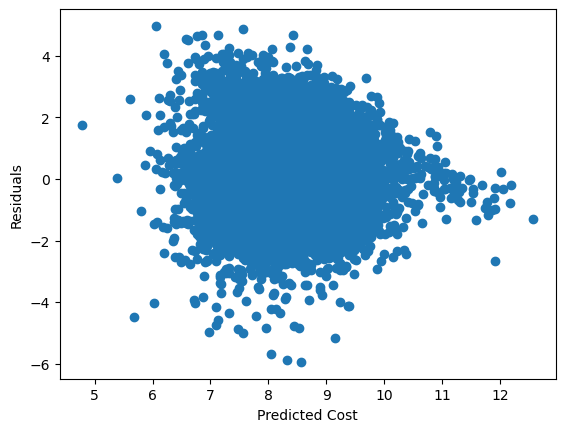

In [173]:
residuals = diabetes_train['log_cost'] - train_predictions[:, 0]

plt.scatter(train_predictions[:, 0], residuals)
plt.xlabel("Predicted Cost")
plt.ylabel("Residuals")



The randomness in our residual plots between predictions of our model and actual values, gives us some confidence that our model can predict cost based on certain factors. 


**Evaluation strength of our model**


In [174]:
train_rmse = np.sqrt(np.mean((train_predictions[:, 0] - diabetes_train['log_cost'])**2))
test_rmse = np.sqrt(np.mean((test_predictions[:, 0]-diabetes_test['log_cost'])**2))
# Print train RMSE
print(f"Train RMSE: {train_rmse:.2f}")
# Print test RMSE
print(f"Test RMSE: {test_rmse:.2f}")

Train RMSE: 1.27
Test RMSE: 1.25


In [ ]:
maximum_train = diabetes_train['log_cost'].max() 
minimum_train = diabetes_train['log_cost'].min()
range_val_train = maximum_train - minimum_train
print(train_rmse/ range_val_train)

maximum_test = diabetes_test['log_cost'].max() 
minimum_test = diabetes_test['log_cost'].min()
range_val_test = maximum_test - minimum_test
print(test_rmse/ range_val_test)

The Rmse confirms that we are not overfitting and our model works well for our dataset taking into account weighted  errors

In [175]:
train_mae= np.mean(np.abs(train_predictions[:, 0] - diabetes_train['log_cost']))
# Print train MAE
print(f'Train MAE: {train_mae:.2f}')
# Print test MAE
test_mae = np.mean(np.abs(test_predictions[:, 0] - diabetes_test['log_cost']))
print(f'Test MAE: {test_mae:.2f}')

Train MAE: 1.01
Test MAE: 0.99


In [ ]:
maximum_train = diabetes_train['log_cost'].max() 
minimum_train = diabetes_train['log_cost'].min()
range_val_train = maximum_train - minimum_train
print(train_mae/ range_val_train)

maximum_test = diabetes_test['log_cost'].max() 
minimum_test = diabetes_test['log_cost'].min()
range_val_test = maximum_test - minimum_test
print(test_mae/ range_val_test)


The Mae confirms that we are not overfitting and our model works well for our dataset 

**Predicting Age based on care recieved**

In [176]:
# we create a new column is_old when age >= 65 and convert it to 1 meaning old and 0 meanning not old
diabetes_with_dummies['is_old'] = (diabetes_with_dummies['Age'] >= 65).astype(int)
diabetes_with_dummies['is_old']

0        1
1        0
2        0
3        1
4        1
        ..
20403    1
20404    1
20405    1
20406    0
20407    1
Name: is_old, Length: 16318, dtype: int64

In [177]:
#create test and train dataframes with same rows as diabetes_train and diabetes_test

is_old_inputs = ['#_Rehabilitation_Hospital','#_SNF', '#_Home_Health', '#_Hospice', '#_DME', 'ER_Admissions','log_cost', 'log_Avg._LOS']
is_old_train = pd.merge(diabetes_train[is_old_inputs], diabetes_with_dummies, on = is_old_inputs, how = 'inner')
is_old_test = pd.merge(diabetes_test[is_old_inputs], diabetes_with_dummies, on = is_old_inputs, how = 'inner')

# is_old_train, is_old_test = train_test_split(diabetes_with_dummies, test_size = 0.2, train_size = 0.8, random_state = 2950)

In [178]:
is_old_train = is_old_train.dropna()
is_old_train = is_old_train[np.isfinite(is_old_train['log_Avg._LOS']) == True] 

X = is_old_train[is_old_inputs]
y = is_old_train[['is_old']].values.ravel()

is_old_logistic_model = LogisticRegression().fit(X,y)

is_old_coefs = is_old_logistic_model.coef_

loop = zip(is_old_inputs, is_old_coefs[0])
d = dict(loop)
for i in d:
    print(f'{i}: {round(d[i],2)}')


#_Rehabilitation_Hospital: -0.23
#_SNF: 0.11
#_Home_Health: -0.11
#_Hospice: 0.18
#_DME: -0.02
ER_Admissions: -0.02
log_cost: -0.09
log_Avg._LOS: 0.03


<Axes: xlabel='log_cost', ylabel='is_old'>

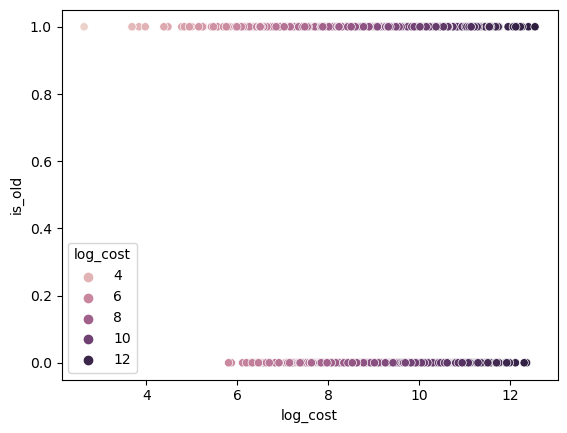

In [179]:
is_old_prediction = is_old_logistic_model.predict_proba(is_old_train[is_old_inputs])
is_old_train['is_old_prediction'] = is_old_prediction[:,0]

sns.scatterplot(is_old_train, x = 'log_cost', y = 'is_old', hue = 'log_cost')

<Axes: xlabel='#_Hospice', ylabel='is_old'>

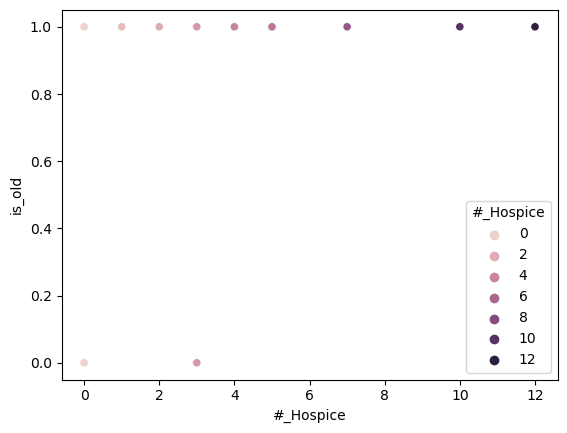

In [180]:
sns.scatterplot(is_old_train, x = '#_Hospice', y = 'is_old', hue = '#_Hospice')

In [ ]:
#normalizer function for evaluation metrics 
def Normalizer(df_cols):
    scaler = preprocessing.StandardScaler().fit(df_cols)
    return(scaler.transform(df_cols))


In [ ]:
#evaluation metrics 
is_old_test = is_old_test[np.isfinite(is_old_test['log_Avg._LOS']) == True] 

X = is_old_test[is_old_inputs]
X = Normalizer(X)
y_pred = is_old_logistic_model.predict(X)

y_true = is_old_test['is_old']
# Print accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'accuracy: {accuracy:.2f}')

# Print precision
precision = precision_score(y_true, y_pred)
print(f'precision: {precision:.2f}')

# Print recall
recall = recall_score(y_true, y_pred)
print(f'recall: {recall:.2f}')

# Print F1
F1 = f1_score(y_true, y_pred)
print(f'F1: {F1:.2f}')

accuracy - The accuracy score shows that 80% of our data models the correct prediction of patients that are old
precision - The precision score shows that out of all the patients predicted to be old, 80% of movies are truly old.
recall - The recall score shows that out of all the correct predictions, 100% are truly old
f1 score - The f1 score shows the 'level of confidence' we have in the prediction of this model because it evaluates the model accuracy by calculating the harmonic mean of both the precision and recall. Since the value 0.89 is close to 1, we can see that the model is doing well and there is a good balance between precision and recall

In [181]:
diabetes_with_dummies.columns

Index(['ID', 'Year', 'Age', 'Race', 'Sex', 'State', 'Zip_Code', 'MSA',
       'Enrollment_Type_Categorized', 'Enrollment_Months', 'HCC_Score',
       'Avg._LOS', 'Diagnosis', '#_Total_Claims', '#_Hospital_OP',
       '#_All_Physician_OP', '#_Inpatient', '#_Short_Term_Stay_Hospital',
       '#_Long_Term_Stay_Hospital', '#_Rehabilitation_Hospital',
       '#_Psychiatric_Hospital', '#_Readmissions', '%_Readmissions', '#_ER',
       '#_ER_Admissions', '#_SNF', '#_Non_Swing_Bed_SNF_Claim',
       '#_Swing_Bed_SNF_Claim', '#_Home_Health', '#_Hospice', '#_Labs',
       '#_Part_B_Labs', '#_Imaging', '#_Part_B_Imaging', '#_Part_B_E&M',
       '#_Part_B_Drugs', '#_Part_B_Ambulance', '#_Dialysis',
       '#_Part-B_Dialysis', '#_Rx_Claims', '#_DME', '#_Miscellaneous',
       'TotalCost_Y_Actual', 'TotalCost_Y_Expected', 'dapagliflozin',
       'exenatide', 'glimepiride', 'glyburide_and_metformin_hydrochloride',
       'insulin', 'metformin_hydrochloride', 'pioglitazone',
       'sitagliptin_and_me

**Interpreting significance of our results**

In [182]:
#df = diabetes_with_dummies[['Northeast', 'South', 'Midwest', 'West', 'Unknown']]
#diabetes_with_dummies.dropna(subset=['TotalCost_Y_Actual'], inplace=True)
#diabetes_with_dummies.dropna(subset=['Northeast', 'South', 'Midwest', 'West'], inplace=True)



X = diabetes_train[['South', 'Midwest', 'West']] #unknown region
X = sm.add_constant(X)
# y = diabetes_train[['TotalCost_Y_Actual']].set_index(y.index)
y = diabetes_train['TotalCost_Y_Actual']

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     TotalCost_Y_Actual   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.037
Date:                Mon, 04 Dec 2023   Prob (F-statistic):             0.0279
Time:                        19:52:17   Log-Likelihood:            -1.3792e+05
No. Observations:               12018   AIC:                         2.758e+05
Df Residuals:                   12014   BIC:                         2.759e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.12e+04   8813.125      1.271      0.2

The coefficient of south region is not very significant (p > 0.05) which means that we fail to reject the null hypothesis, indicating that there is no statistical significance on the price if the patients live in the south region 

The coefficient of midwest region is not very significant (p > 0.05) which means that we fail to reject the null hypothesis, indicating that there is no statistical significance on the price if the patients live in the midwest region 

The coefficient of West region is very significant (p < 0.05) which means that we can reject the null hypothesis, indicating that there is a statistical significance on the price if the patients live in the west region


In [183]:

X = diabetes_train[[ 'Asian', 'Black', 'Hispanic',
       'North_American_Native',  'White']] # took out unknown_race and native american
X = sm.add_constant(X)

y = diabetes_train['TotalCost_Y_Actual']

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     TotalCost_Y_Actual   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.243
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           0.000743
Time:                        19:52:17   Log-Likelihood:            -1.3791e+05
No. Observations:               12018   AIC:                         2.758e+05
Df Residuals:                   12012   BIC:                         2.759e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9063.99

The coefficient of Asian population is not very significant (p > 0.05) which means that we fail to reject the null hypothesis, indicating that there is no statistical significance between the asian population and the price 

The coefficient of Black population is very significant (p < 0.05) which means that we can reject the null hypothesis, indicating that there is a statistical significance between the black population and the price 

The coefficient of Hispanic population is not very significant (p > 0.05) which means that we fail to reject the null hypothesis, indicating that there is no statistical significance between the Hispanic population and the price 

The coefficient of North American Native population is very significant (p < 0.05) which means that we can reject the null hypothesis, indicating that there is a statistical significance between the North American Native population and the price 

The coefficient of White population is very significant (p < 0.05) which means that we can reject the null hypothesis, indicating that there is a statistical significance between the White population and the price 


In [184]:

X = diabetes_train[['Avg_ADI']]
    
X = sm.add_constant(X)

y = diabetes_train['TotalCost_Y_Actual']

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     TotalCost_Y_Actual   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                 5.056e-05
Date:                Mon, 04 Dec 2023   Prob (F-statistic):              0.994
Time:                        19:52:17   Log-Likelihood:            -1.3792e+05
No. Observations:               12018   AIC:                         2.758e+05
Df Residuals:                   12016   BIC:                         2.759e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.194e+04   1023.894     11.665      0.0

The coefficient of deprivation index is not very significant (p > 0.05) which means that we fail to reject the null hypothesis, indicating that there is no statistical significance between the deprivation index and the price 

In [185]:
#t-test for significance of different types of treatments on prices
input_columns = ['#_Rehabilitation_Hospital',
        '#_Readmissions', '#_Labs', '#_Imaging', '#_Dialysis', 
         '#_DME', 'dapagliflozin','exenatide', 'glimepiride', 'glyburide_and_metformin_hydrochloride',
       'insulin', 'metformin_hydrochloride', 'pioglitazone',
       'sitagliptin_and_metformin_hydrochloride','ER_Admissions']
X = diabetes_train[input_columns]
y = diabetes_train[['TotalCost_Y_Actual']]

X = sm.add_constant(diabetes_train[input_columns])
model = sm.OLS(y, X)
results = model.fit()
summary = results.summary()

table = summary.tables[1]
print(table)


                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                    7137.3889    646.332     11.043      0.000    5870.474    8404.304
#_Rehabilitation_Hospital               -1400.6798   3063.944     -0.457      0.648   -7406.506    4605.147
#_Readmissions                           3295.5052   2417.818      1.363      0.173   -1443.809    8034.819
#_Labs                                    365.3148     44.607      8.190      0.000     277.879     452.751
#_Imaging                                1472.7660    112.100     13.138      0.000    1253.031    1692.501
#_Dialysis                               4140.7406    198.425     20.868      0.000    3751.796    4529.685
#_DME                                     299.4916     36.569      8.190      0.000     227.810     371.173
dapagliflozin               

The coefficient of number of ER admissions is very significant (p < 0.05) which means that we can reject the null hypothesis, there is no evidence that it is not significant.

The coefficient of number of labs is very significant (p < 0.05) which means that we can reject the null hypothesis, there is no evidence that it is not significant. 

The coefficient of number of imaging is very significant (p < 0.05) which means that we can reject the null hypothesis, there is no evidence that it is not significant.

The coefficient of dialysis is very significant (p < 0.05) which means that we can reject the null hypothesis, there is no evidence that it is not significant.

The coefficient of DME is very significant (p < 0.05) which means that we can reject the null hypothesis, there is no evidence that it is not significant. 

The coefficient of glimepiride  is very significant (p < 0.05) which means that we can reject the null hypothesis,there is no evidence that it is not significant.

The coefficient of sitagliptin_and_metformin_hydrochloride is very significant (p < 0.05) which means that we can reject the null hypothesis, there is no evidence that it is not significant. 

The coefficient of insulin is very significant (p < 0.05) which means that we can reject the null hypothesis, there is no evidence that it is not significant.

The coefficient of metformin_hydrochloride is very significant (p < 0.05) which means that we can reject the null hypothesis, there is no evidence that it is not significant. 
